# DAgger: HalfCheetah-v4 Experiment Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/hw1/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

In [5]:
exp_path = 'tune_exps/'

In [6]:
cat_hyper_params = ['batch_size', 'n_layers', 'size', 
                    'train_batch_size', 'num_agent_train_steps_per_iter', 'n_iter']
cont_hyper_params = ['learning_rate']

## HalfCheetah v4 Experiment Hyper-parameter optimization analysis

In [7]:
experiments = [folder for folder in os.listdir(exp_path) if folder.startswith('q2_tune_hc')]

In [8]:
len(experiments)

273

In [9]:
import json

In [10]:
from tqdm import tqdm

In [11]:
df = None
for experiment in tqdm(sorted(experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'r'))
            if params['eval_batch_size'] != 10000 and params['ep_len'] != 1024: 
                continue
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2
            if 'Agent_Accuracy' not in progress_df.columns:
                continue
            if df is None:
                df = progress_df.iloc[-1, :].copy()
            else:
                df = pd.concat([df, progress_df.iloc[-1, :]], axis=1)
        else:
            continue
    except:
        print(f'{experiment} exception!')
        continue
df = df.T

 12%|█████████████                                                                                                  | 32/273 [00:00<00:01, 149.93it/s]

q2_tune_hc_dagger_HalfCheetah-v4_15-09-2022_22-05-38 exception!


 18%|███████████████████▌                                                                                           | 48/273 [00:00<00:01, 144.16it/s]

q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_01-41-15 exception!


 33%|█████████████████████████████████████                                                                          | 91/273 [00:00<00:01, 134.00it/s]

q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_04-07-10 exception!


 85%|█████████████████████████████████████████████████████████████████████████████████████████████                 | 231/273 [00:01<00:00, 143.34it/s]

q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_13-51-51 exception!
q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_13-59-39 exception!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 273/273 [00:01<00:00, 137.86it/s]

q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_18-13-43 exception!


In [12]:
df.shape

(235, 48)

In [13]:
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,no_gpu,which_gpu,max_replay_buffer_size,save_params,seed,logdir,discrete,ac_dim,ob_dim,render_mode
2,2,-666.1598,199.55408,-247.04697,-1017.156,1000.0,-701.3178,87.75291,-583.2055,-793.3584,...,False,0,1000000,False,1658,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
4,4,3132.8118,983.49097,3668.907,226.22867,1000.0,3521.095,166.72835,3684.1987,3292.08,...,False,0,1000000,False,1877,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
2,2,2378.476,156.18452,2644.6794,2084.5635,1000.0,2480.0186,170.52014,2650.5388,2309.4985,...,False,0,1000000,False,1030,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
9,9,2172.8093,167.13042,2519.681,1928.9373,1000.0,1915.163,315.8485,2225.3633,1481.7244,...,False,0,1000000,False,729,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None
19,19,-414.1564,205.45493,-156.79886,-952.69257,1000.0,-291.6068,0.0,-291.6068,-291.6068,...,False,0,1000000,False,246,/home/mohsen/projects/cs285/hw1/cs285/scripts/...,False,6,17,None


In [14]:
df['Training Loss'].describe()

count     235.000000
unique    234.000000
top         0.578964
freq        2.000000
Name: Training Loss, dtype: float64

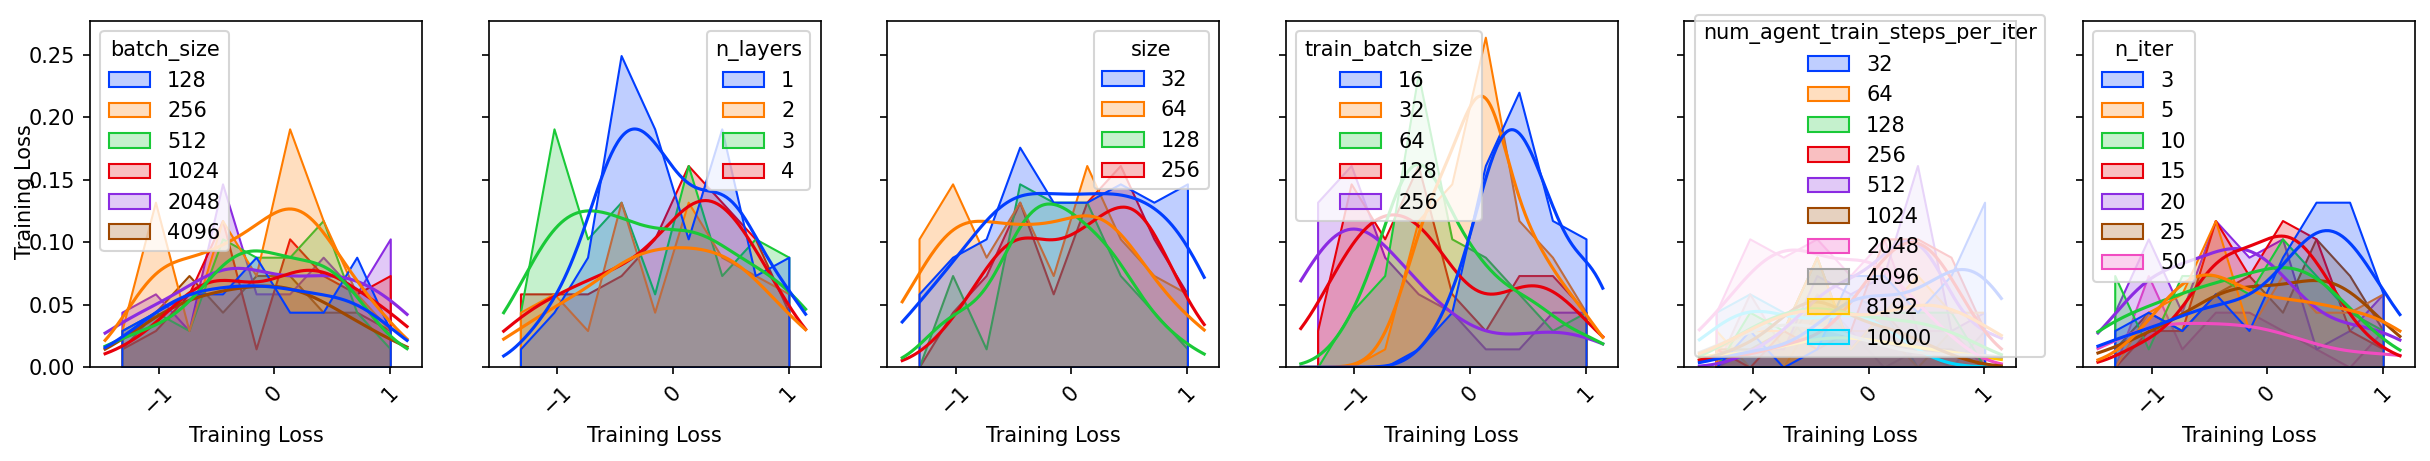

In [15]:
fig, ax = plt.subplots(1, len(cat_hyper_params), sharey=True, sharex=False, figsize=(20, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.1, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.histplot(data=df, x='Training Loss', hue=param, ax=ax[i], fill=True,
                     palette=sns.color_palette('bright', len(df[param].unique())), kde=True, 
                     element='poly', stat='density')
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3607872/2049649591.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,


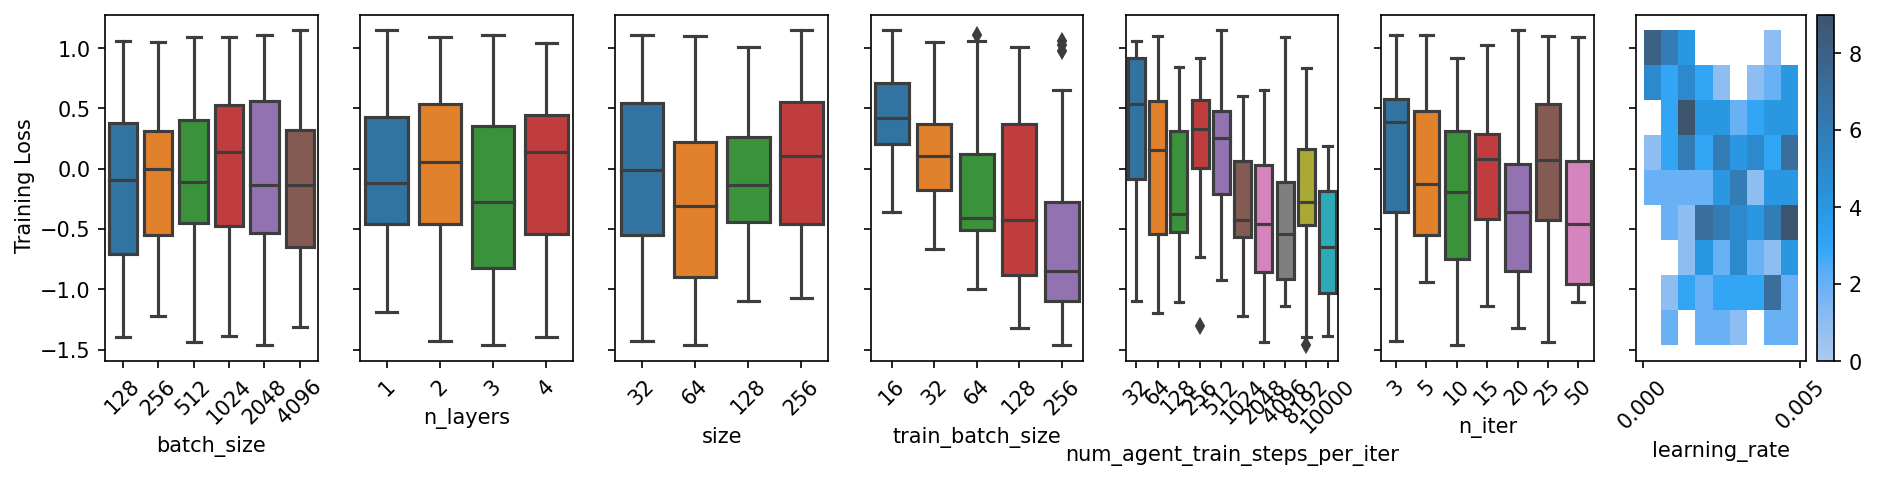

In [16]:
fig, ax = plt.subplots(1, len(cat_hyper_params) + len(cont_hyper_params), sharey=True, sharex=False, figsize=(15, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.085, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.boxplot(data=df, x=param, y='Training Loss', ax=ax[i])
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

offset = len(cat_hyper_params)

for i, param in enumerate(cont_hyper_params):
    # g = sns.scatterplot(data=df, x=param, y='Training Loss', ax=ax[i + offset])
    # g.set_ylabel('')
    g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,
            palette=sns.color_palette("coolwarm", as_cmap=True), cbar=True,
            ax=ax[i + offset])
    ax[i + offset].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3607872/2945391405.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
/home/mohsen/miniconda3/envs/cs285/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


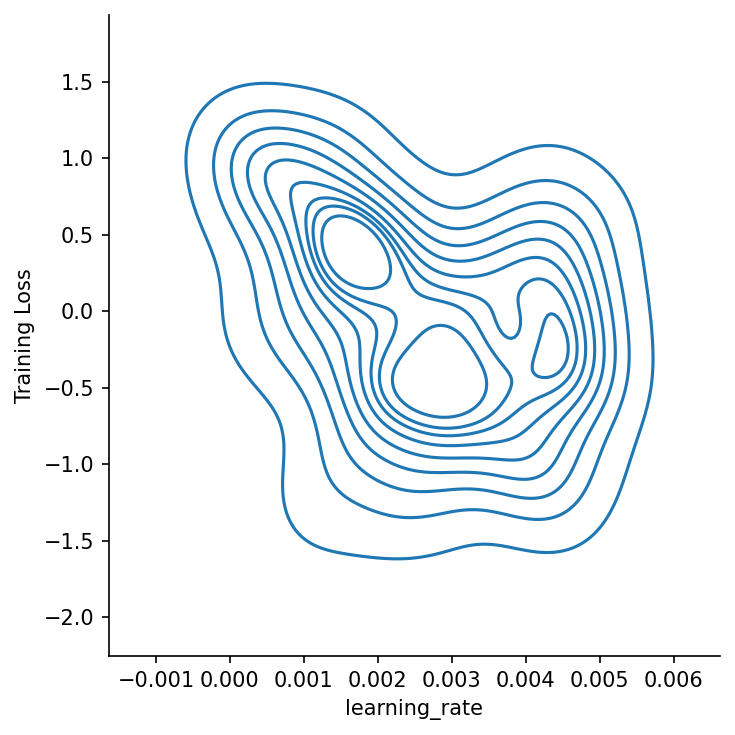

In [17]:
sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
            palette=sns.color_palette("coolwarm", as_cmap=True), 
            binwidth=(0.1, .1e-5), cbar=False)

In [18]:
df[df['Training Loss'] == df['Training Loss'].min()]['id']

9    q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_16...
Name: id, dtype: object

In [19]:
plot_df = df[cat_hyper_params]
target_df = df['Training Loss']

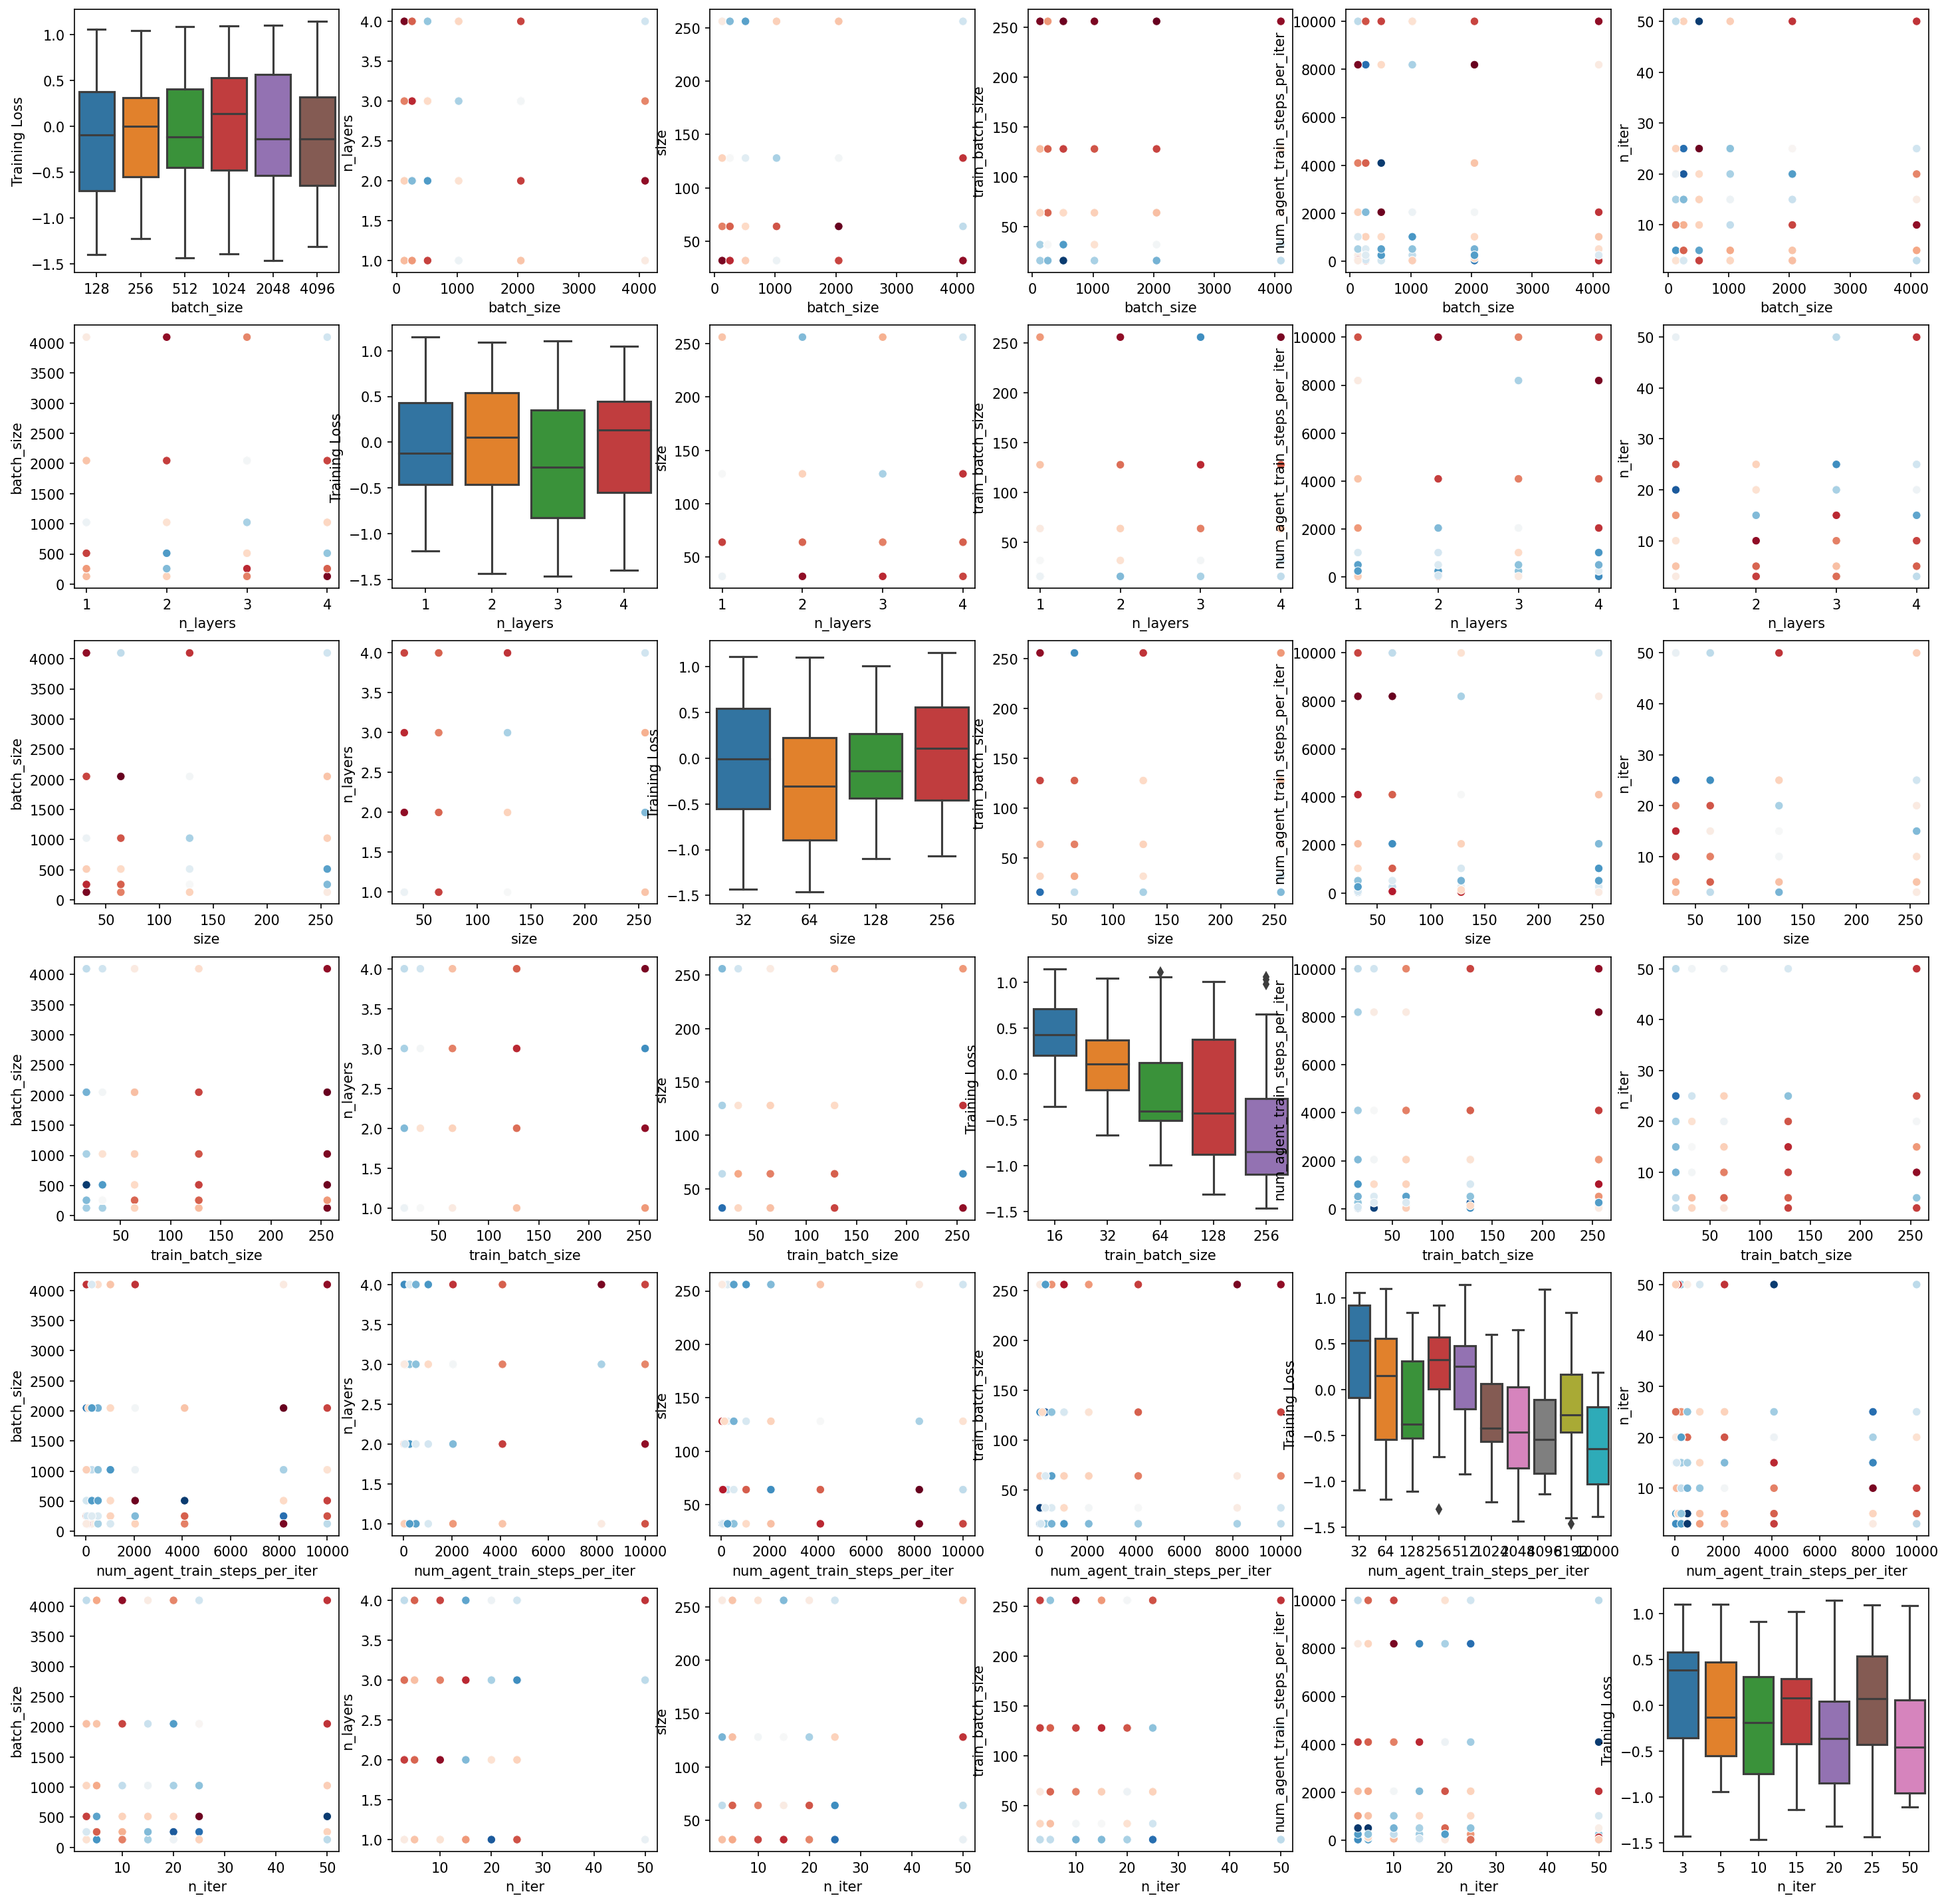

In [20]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette=sns.color_palette('RdBu', as_cmap=True),
                            legend=False)


## Evaluating the best model's performance

### Best config extraction

In [21]:
df['Training Loss'].min()

-1.4636735

In [22]:
df[df['Training Loss'] == df['Training Loss'].min()].to_dict(orient='records')

[{'Iteration': 9,
  'Eval_AverageReturn': 4010.1235,
  'Eval_StdReturn': 68.51774,
  'Eval_MaxReturn': 4092.0134,
  'Eval_MinReturn': 3842.8264,
  'Eval_AverageEpLen': 1000.0,
  'Train_AverageReturn': 4120.113,
  'Train_StdReturn': 72.769424,
  'Train_MaxReturn': 4220.5503,
  'Train_MinReturn': 4050.4702,
  'Train_AverageEpLen': 1000.0,
  'Train_EnvstepsSoFar': 27000,
  'TimeSinceStart': 178.49072527885437,
  'Training Loss': -1.4636735,
  'Initial_DataCollection_AverageReturn': 4205.7783,
  'Expert_AverageReturn': 4042.0444,
  'Expert_StdReturn': 68.36664,
  'Expert_MaxReturn': 4139.045,
  'Expert_MinReturn': 3930.6797,
  'Expert_AverageEpLen': 1000.0,
  'Agent_Accuracy': 0.9881185,
  'id': 'q2_tune_hc_dagger_HalfCheetah-v4_16-09-2022_16-11-13',
  'expert_policy_file': 'cs285/policies/experts/HalfCheetah.pkl',
  'expert_data': 'cs285/expert_data/expert_data_HalfCheetah-v4.pkl',
  'env_name': 'HalfCheetah-v4',
  'exp_name': 'tune_hc_dagger',
  'do_dagger': True,
  'ep_len': 1024,
  'nu

In [24]:
!pwd

/home/mohsen/projects/cs285/hw1


In [31]:
!MUJOCO_GL="egl" python -m cs285.scripts.run_hw1 --expert_policy_file cs285/policies/experts/HalfCheetah.pkl --env_name HalfCheetah-v4 --exp_name dagger_hc_best --n_iter 10 --expert_data cs285/expert_data/expert_data_HalfCheetah-v4.pkl --video_log_freq 5 --size 64 --n_layers 3 --train_batch_size 256 --ep_len 1024 --batch_size 2048 --eval_batch_size 10000 --learning_rate 0.001099177969836787 --num_agent_train_steps_per_iter 8192 --seed 9873 --save_params --do_dagger

########################
logging outputs to  /home/mohsen/projects/cs285/hw1/cs285/scripts/../../data/q2_dagger_hc_best_HalfCheetah-v4_16-09-2022_19-03-12
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/HalfCheetah.pkl
obs (1, 17) (1, 17)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Iteration : 0
Eval_AverageReturn : 4032.39501953125
Eval_StdReturn : 76.32135772705078
Eval_MaxReturn : 4146.8896484375
Eval_MinReturn : 3870.75341796875
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 4205.7783203125
Train_StdReturn : 83.038818359375
Train_MaxReturn : 4288.81689453125
Train_MinReturn : 4122.7392578125
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 90.39694333076477
Training Loss : -2.6203017234802246
Initial_DataCollection_AverageReturn : 4205.7783203125
Expert_AverageReturn : 4071.89013671875
Expert_StdReturn

In [32]:
df = pd.read_csv('data/q2_dagger_hc_best_HalfCheetah-v4_16-09-2022_19-03-12/progress.csv')
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,Train_EnvstepsSoFar,TimeSinceStart,Training Loss,Initial_DataCollection_AverageReturn,Expert_AverageReturn,Expert_StdReturn,Expert_MaxReturn,Expert_MinReturn,Expert_AverageEpLen,Agent_Accuracy
0,0,4032.3950,76.321360,4146.8896,3870.7534,1000.0,4205.7783,83.038820,4288.8170,4122.7393,...,0,90.396943,-2.620302,4205.7783,4071.8901,62.711586,4196.2830,3979.7144,1000.0,0.983290
1,1,4109.3700,94.475876,4202.0470,3865.9546,1000.0,4051.0342,47.238094,4114.0270,4000.2740,...,3000,224.866674,-2.829036,4205.7783,4092.3638,94.511470,4253.2373,3907.3608,1000.0,0.980748
2,2,4016.1320,88.463580,4175.5293,3884.2378,1000.0,4133.8794,93.620340,4260.5796,4037.2510,...,6000,360.093384,-2.720727,4205.7783,4074.6113,63.790432,4167.0337,3969.9575,1000.0,0.977321
3,3,4113.3545,94.787600,4248.1290,3958.6191,1000.0,4037.8816,23.503939,4058.1514,4004.9321,...,9000,492.558440,-2.985142,4205.7783,4085.3235,78.808990,4225.5493,3954.5266,1000.0,0.980624
4,4,4081.0925,56.602833,4184.4053,3997.9243,1000.0,4008.5872,10.712463,4017.5317,3993.5260,...,12000,644.291379,-3.033386,4205.7783,4060.1516,57.314228,4133.6450,3975.3076,1000.0,0.986996


/tmp/ipykernel_3607872/2114212213.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='value', hue='kind',


<AxesSubplot:xlabel='Iteration', ylabel='Return'>

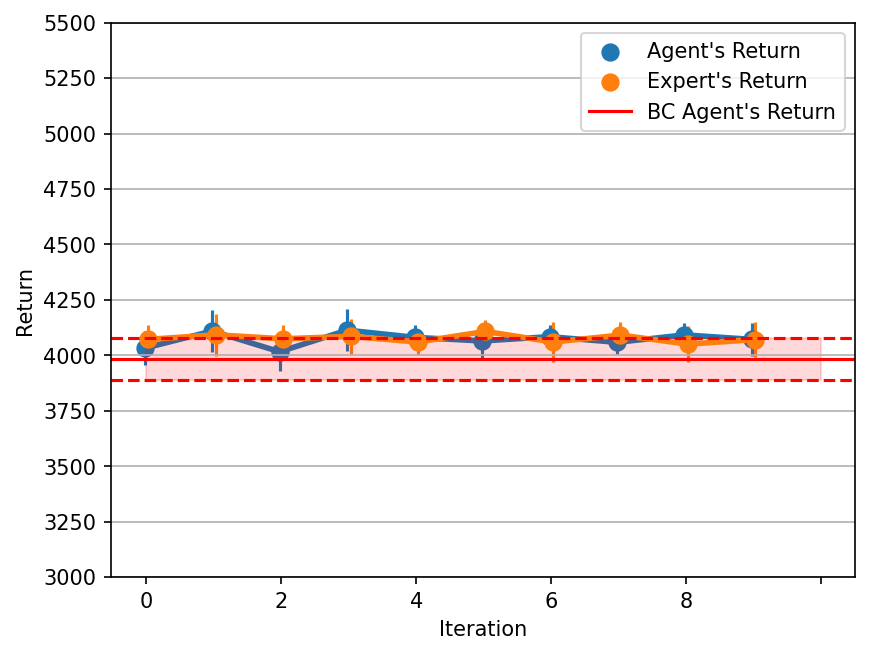

In [71]:
melted_df = pd.melt(df, id_vars=['Iteration'], var_name='kind')

melted_df = melted_df[melted_df['kind'].isin(['Eval_AverageReturn', 'Expert_AverageReturn'])]

melted_df['kind'] = melted_df['kind'].str.replace('Eval_AverageReturn', 'Agent\'s Return')
melted_df['kind'] = melted_df['kind'].str.replace('Expert_AverageReturn', 'Expert\'s Return')

ax = sns.pointplot(x='Iteration', y='value', hue='kind',
    data=melted_df, dodge=True, join=True, ci=None)
# plt.legend()
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)


# # Calculate the type of error to plot as the error bars
# # Make sure the order is the same as the points were looped over
errors = df['Eval_StdReturn'].values
ax.errorbar(x_coords[:len(x_coords) // 2], y_coords[:len(x_coords) // 2], yerr=errors, fmt=' ', zorder=-1)

errors = df['Expert_StdReturn'].values
ax.errorbar(x_coords[len(x_coords) // 2:], y_coords[len(x_coords) // 2:], yerr=errors, fmt=' ', zorder=-1)
plt.xticks(np.arange(0, len(df) + 1, len(df) // 5))
plt.grid(axis='y')
plt.ylabel('Return')
mean = 3982.04
std = 94.67897
plt.axhline(y=mean + std, color='r', linestyle='--')
plt.axhline(y=mean - std, color='r', linestyle='--')
plt.axhline(y=mean, color='r', linestyle='-', label='BC Agent\'s Return')
ax.fill_between(x=np.arange(0, len(df) + 1), y1=mean - std, y2=mean + std, alpha=0.15, color='r')
plt.legend()
plt.yticks(np.arange(3000, 5501, 250))
ax

/tmp/ipykernel_3607872/892766656.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Agent_Accuracy',


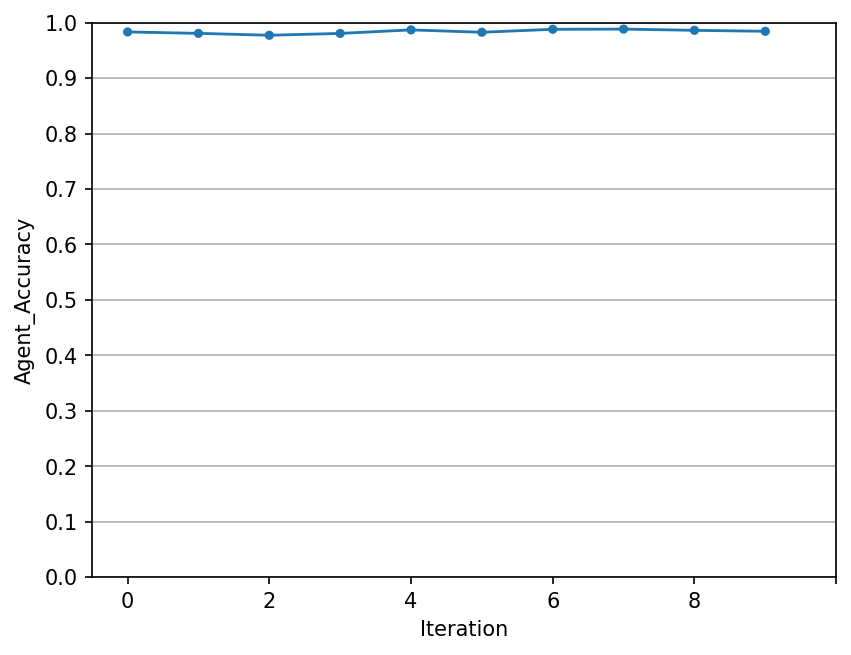

In [72]:
ax = sns.pointplot(x='Iteration', y='Agent_Accuracy', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, len(df) + 1, len(df) // 5))
plt.yticks(np.arange(0., 1.1, 0.1))
plt.grid(axis='y')
plt.show()

/tmp/ipykernel_3607872/3556736396.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Training Loss',


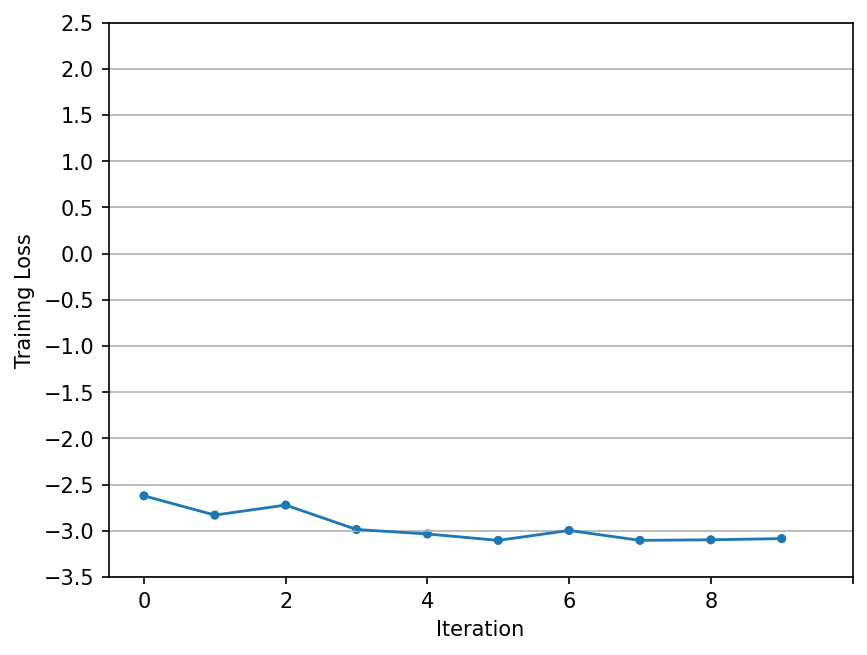

In [73]:
ax = sns.pointplot(x='Iteration', y='Training Loss', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, len(df) + 1, len(df) // 5))
plt.yticks(np.arange(2.5, -4.0, -0.5))
plt.grid(axis='y')
plt.show()